# A1:Regression Analysis

Juan Pablo Peña <br>
Hult International Business School <br>
Date: April 2nd, 2022

#  Introduction
<p style='text-align: justify;'> The purpose of this assignment is to build the best regression model given the features (i.e., columns) in the dataset "Apprentice_Chef_Dataset.xlsx". First a dataset exploration will be done to understand the general information about each feature, including types and the number of non-missing values. In the second part feature engineering will be conducted to improve the model´s accuracy. In the third part different predictive models including Lasso Regression, Bayesian Automatic Relevance Determination (ARD) and K-Nearest Neighbors Regression (KNN) will be built and scored, and hyperparameter tuning will be applied. In the last part, the best model will be selected from the group and  the model results will be shown in a dynamic string including model type, training score, testing score and train-test gap. </p>

# Part I: Fundamental Dataset Exploration


In [1]:
# importing libraries

import pandas as pd  # data science essentials
import numpy as np # arithmetic calculations
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns           # enhanced graphical output
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
import sklearn.linear_model # linear modeling in scikit-learn
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler
import gender_guesser.detector as gender # guess gender based on (given) name

# specifying file name
file = './__datasets/Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
apprentice = pd.read_excel(io = file)


1.2) Display the first 5 rows of each feature to get a feel for the data.

In [2]:
# displaying the first rows of the DataFrame
apprentice.head(n = 10)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.00,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,...,0,2,0,0,33.4,1,0,1,17,0
1,1365.00,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,...,0,2,0,0,84.8,1,0,3,13,170
2,800.00,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,...,0,1,0,0,63.0,1,0,2,16,0
3,600.00,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,...,0,3,0,0,43.8,1,0,2,14,0
4,1490.00,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,...,0,8,0,0,84.8,1,1,3,12,205
5,1550.00,1,Genna Lannister,genna.lannister@protonmail.com,Genna,Lannister,36,2,9,1,...,0,3,1,0,78.8,1,1,3,12,0
6,1430.00,1,Olene Tyrell,olene.tyrell@mcdonalds.com,Olene,Tyrell,61,7,6,2,...,1,2,1,1,84.8,1,0,3,12,169
7,1321.25,1,Stevron Frey,stevron.frey@travelers.com,Stevron,Frey,13,1,12,3,...,0,0,0,0,63.0,1,0,1,15,0
8,1505.00,1,Praed,praed@nike.com,Praed,Praed,16,1,12,5,...,0,1,0,0,63.0,1,0,2,18,0
9,1493.00,0,Alysane Mormont,alysane.mormont@caterpillar.com,Alysane,Mormont,95,3,6,8,...,0,2,1,0,84.8,1,1,3,14,147


1.3) Display general information about each feature, including types and the number of non-missing values.

In [3]:
# Information about each feature
apprentice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

# Part II: Feature Engineering

## Part II-I: Review of Missing Value Analysis and Imputation

In [4]:
# taking the apprentice dataset
# and then
# transforming it into boolean based on if a value is null
# and then
# summing together the results per column

apprentice.isnull().sum(axis=0)

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

From the review of missing values, it is possible to observe FAMILY_NAME is the only variable of the data set with missing values. In order to select the best strategy to impute them, it might be a good idea to create a frequency table and select the most frequent family name as imputation value.

In [5]:
apprentice['FAMILY_NAME'].value_counts()

Frey            79
Stark           32
Lannister       29
Tyrell          28
Targaryen       24
                ..
Dance-for-Me     1
Delp             1
Eldiss           1
Erreck           1
Turnip           1
Name: FAMILY_NAME, Length: 1070, dtype: int64

In [6]:
# imputing missing values with the Frey
fill = 'Frey'

# FAMILY_NAME
apprentice['FAMILY_NAME'] = apprentice['FAMILY_NAME'].fillna(fill)

In [7]:
# making sure all missing values have been taken care of
apprentice.isnull().any().any()

False

In [8]:
apprentice['FAMILY_NAME'].value_counts()

Frey            126
Stark            32
Lannister        29
Tyrell           28
Targaryen        24
               ... 
Dance-for-Me      1
Delp              1
Eldiss            1
Erreck            1
Turnip            1
Name: FAMILY_NAME, Length: 1070, dtype: int64

## Part II - II: Developing Trend-Based Features

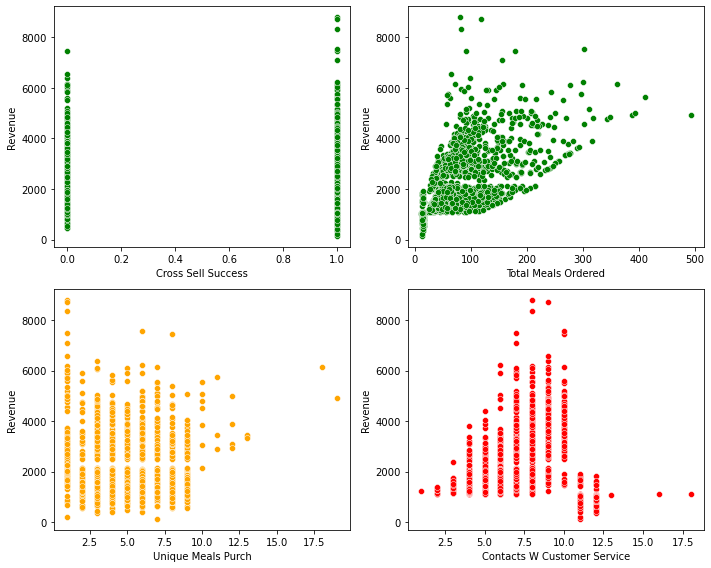

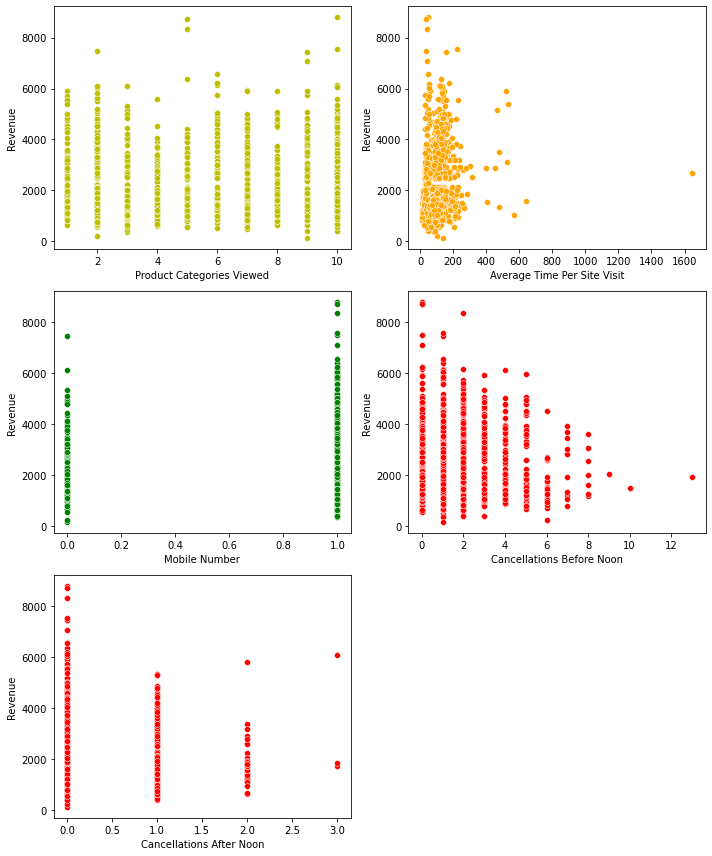

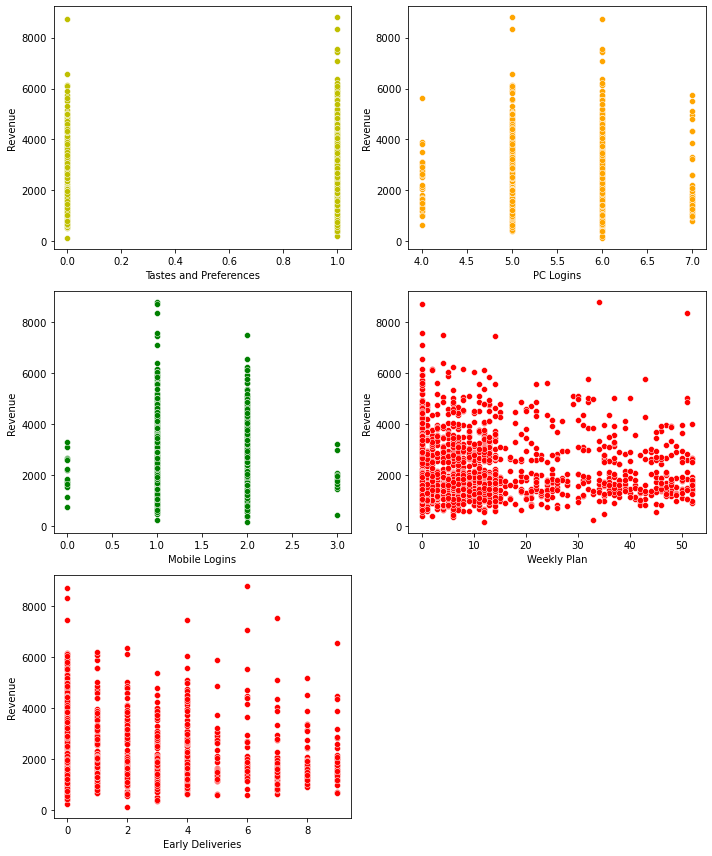

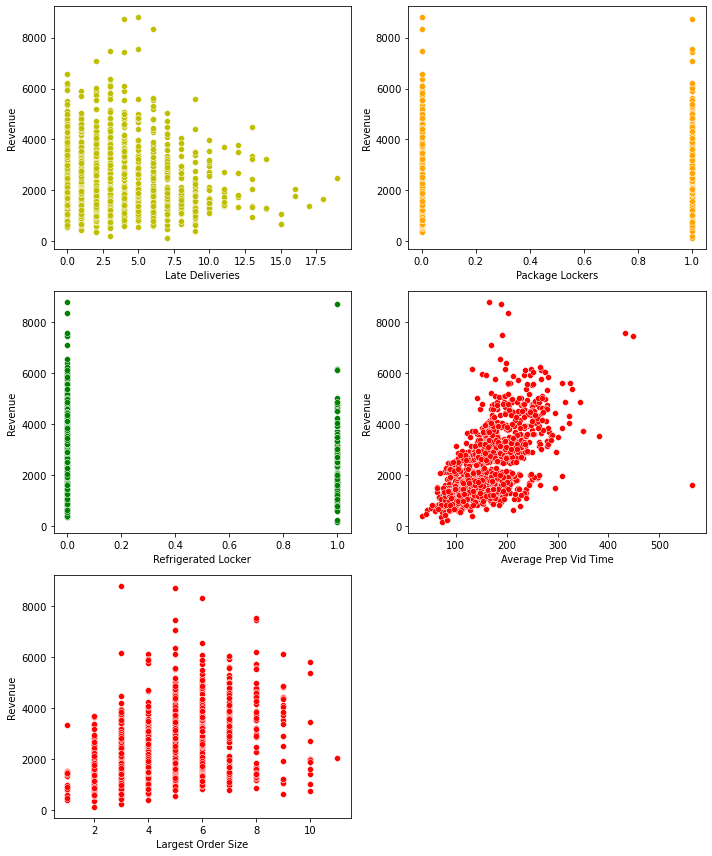

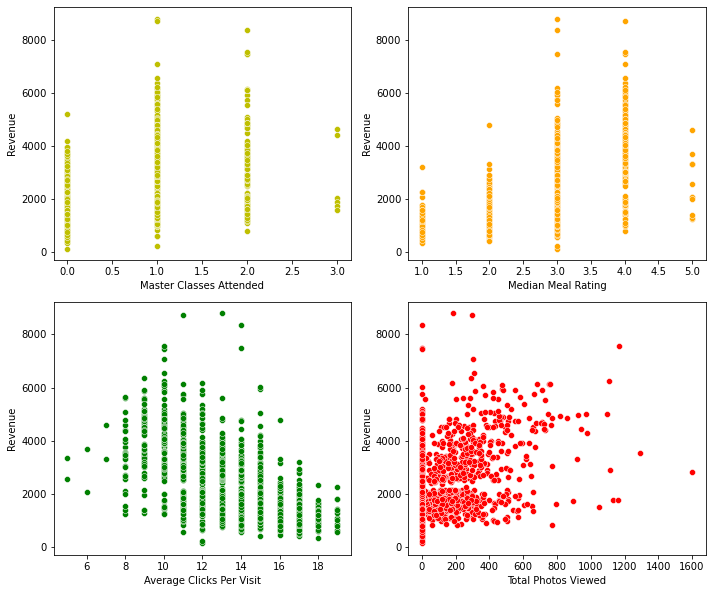

In [9]:
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice['CROSS_SELL_SUCCESS'],
                y = apprentice['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Cross Sell Success')
plt.ylabel(ylabel = 'Revenue')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = apprentice['TOTAL_MEALS_ORDERED'],
                y = apprentice['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Total Meals Ordered')
plt.ylabel(ylabel = 'Revenue')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = apprentice['UNIQUE_MEALS_PURCH'],
                y = apprentice['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Unique Meals Purch')
plt.ylabel(ylabel = 'Revenue')


########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = apprentice['CONTACTS_W_CUSTOMER_SERVICE'],
                y = apprentice['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Contacts W Customer Service')
plt.ylabel(ylabel = 'Revenue')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('./__analysis_images/Apprentice Chef Scatterplots 1 of 5.png')
plt.show()


########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = apprentice['PRODUCT_CATEGORIES_VIEWED'],
                y = apprentice['REVENUE'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'Product Categories Viewed')
plt.ylabel(ylabel = 'Revenue')


########################


# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = apprentice['AVG_TIME_PER_SITE_VISIT'],
                y = apprentice['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Average Time Per Site Visit')
plt.ylabel(ylabel = 'Revenue')


########################


# developing a scatterplot
plt.subplot(3, 2, 3)
sns.scatterplot(x = apprentice['MOBILE_NUMBER'],
                y = apprentice['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Mobile Number')
plt.ylabel(ylabel = 'Revenue')


########################


# developing a scatterplot
plt.subplot(3, 2, 4)
sns.scatterplot(x = apprentice['CANCELLATIONS_BEFORE_NOON'],
                y = apprentice['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Cancellations Before Noon')
plt.ylabel(ylabel = 'Revenue')


########################


# developing a scatterplot
plt.subplot(3, 2, 5)
sns.scatterplot(x = apprentice['CANCELLATIONS_AFTER_NOON'],
                y = apprentice['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Cancellations After Noon')
plt.ylabel(ylabel = 'Revenue')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('./__analysis_images/Apprentice Chef Scatterplots 2 of 5.png')
plt.show()

########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = apprentice['TASTES_AND_PREFERENCES'],
                y = apprentice['REVENUE'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'Tastes and Preferences')
plt.ylabel(ylabel = 'Revenue')


########################


# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = apprentice['PC_LOGINS'],
                y = apprentice['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'PC Logins')
plt.ylabel(ylabel = 'Revenue')


########################


# developing a scatterplot
plt.subplot(3, 2, 3)
sns.scatterplot(x = apprentice['MOBILE_LOGINS'],
                y = apprentice['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Mobile Logins')
plt.ylabel(ylabel = 'Revenue')


########################


# developing a scatterplot
plt.subplot(3, 2, 4)
sns.scatterplot(x = apprentice['WEEKLY_PLAN'],
                y = apprentice['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Weekly Plan')
plt.ylabel(ylabel = 'Revenue')


########################


# developing a scatterplot
plt.subplot(3, 2, 5)
sns.scatterplot(x = apprentice['EARLY_DELIVERIES'],
                y = apprentice['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Early Deliveries')
plt.ylabel(ylabel = 'Revenue')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('./__analysis_images/Apprentice Chef Scatterplots 3 of 5.png')
plt.show()

########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = apprentice['LATE_DELIVERIES'],
                y = apprentice['REVENUE'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'Late Deliveries')
plt.ylabel(ylabel = 'Revenue')


########################


# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = apprentice['PACKAGE_LOCKER'],
                y = apprentice['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Package Lockers')
plt.ylabel(ylabel = 'Revenue')


########################


# developing a scatterplot
plt.subplot(3, 2, 3)
sns.scatterplot(x = apprentice['REFRIGERATED_LOCKER'],
                y = apprentice['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Refrigerated Locker')
plt.ylabel(ylabel = 'Revenue')


########################


# developing a scatterplot
plt.subplot(3, 2, 4)
sns.scatterplot(x = apprentice['AVG_PREP_VID_TIME'],
                y = apprentice['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Average Prep Vid Time')
plt.ylabel(ylabel = 'Revenue')


########################


# developing a scatterplot
plt.subplot(3, 2, 5)
sns.scatterplot(x = apprentice['LARGEST_ORDER_SIZE'],
                y = apprentice['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Largest Order Size')
plt.ylabel(ylabel = 'Revenue')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('./__analysis_images/Apprentice Chef Scatterplots 4 of 5.png')
plt.show()

########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = apprentice['MASTER_CLASSES_ATTENDED'],
                y = apprentice['REVENUE'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'Master Classes Attended')
plt.ylabel(ylabel = 'Revenue')


########################


# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = apprentice['MEDIAN_MEAL_RATING'],
                y = apprentice['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Median Meal Rating')
plt.ylabel(ylabel = 'Revenue')


########################


# developing a scatterplot
plt.subplot(3, 2, 3)
sns.scatterplot(x = apprentice['AVG_CLICKS_PER_VISIT'],
                y = apprentice['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Average Clicks Per Visit')
plt.ylabel(ylabel = 'Revenue')


########################


# developing a scatterplot
plt.subplot(3, 2, 4)
sns.scatterplot(x = apprentice['TOTAL_PHOTOS_VIEWED'],
                y = apprentice['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Total Photos Viewed')
plt.ylabel(ylabel = 'Revenue')

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('./__analysis_images/Apprentice Chef Scatterplots 5 of 5.png')
plt.show()



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

From the scatter plots above, it is evident that there are several features have a high amount of zero values. Let's explore further by analyzing how many observations are affected by these phenomena.
<br><br><br>

In [10]:
# counting the number of zeroes for 
mo_zeroes   = len(apprentice['TOTAL_MEALS_ORDERED'][apprentice['TOTAL_MEALS_ORDERED'] == 0]) # TOTAL_MEALS_ORDERED
um_zeroes     = len(apprentice['UNIQUE_MEALS_PURCH'][apprentice['UNIQUE_MEALS_PURCH'] == 0]) # UNIQUE_MEALS_PURCH
product_zeroes = len(apprentice['PRODUCT_CATEGORIES_VIEWED'][apprentice['PRODUCT_CATEGORIES_VIEWED'] == 0]) # PRODUCT_CATEGORIES_VIEWED
av_zeroes   = len(apprentice['AVG_TIME_PER_SITE_VISIT'][apprentice['AVG_TIME_PER_SITE_VISIT'] == 0]) # AVG_TIME_PER_SITE_VISIT
bn_zeroes    = len(apprentice['CANCELLATIONS_BEFORE_NOON'][apprentice['CANCELLATIONS_BEFORE_NOON'] == 0]) # CANCELLATIONS_BEFORE_NOON
an_zeroes  = len(apprentice['CANCELLATIONS_AFTER_NOON'][apprentice['CANCELLATIONS_AFTER_NOON'] == 0]) # CANCELLATIONS_AFTER_NOON
wp_zeroes   = len(apprentice['WEEKLY_PLAN'][apprentice['WEEKLY_PLAN'] == 0]) # WEEKLY_PLAN
ed_zeroes    = len(apprentice['EARLY_DELIVERIES'][apprentice['EARLY_DELIVERIES'] == 0]) # EARLY_DELIVERIES
ld_zeroes  = len(apprentice['LATE_DELIVERIES'][apprentice['LATE_DELIVERIES'] == 0]) # LATE_DELIVERIES
ma_zeroes    = len(apprentice['MASTER_CLASSES_ATTENDED'][apprentice['MASTER_CLASSES_ATTENDED'] == 0]) # MASTER_CLASSES_ATTENDED
photos_zeroes  = len(apprentice['TOTAL_PHOTOS_VIEWED'][apprentice['TOTAL_PHOTOS_VIEWED'] == 0]) # TOTAL_PHOTOS_VIEWED


## the table below has been coded for you ##

# printing a table of the results
print(f"""
                 No\t\tYes
               ---------------------
Total Meals    | {mo_zeroes}\t\t{len(apprentice) - mo_zeroes}
Unique Meals   | {um_zeroes}\t\t{len(apprentice) - um_zeroes}
Product Cat    | {product_zeroes}\t\t{len(apprentice) - product_zeroes}
Avg Time       | {av_zeroes}\t\t{len(apprentice) - av_zeroes}
Canc bn        | {bn_zeroes}\t\t{len(apprentice) - bn_zeroes}
Canc an        | {an_zeroes}\t\t{len(apprentice) - an_zeroes}
Weekly Plan    | {wp_zeroes}\t\t{len(apprentice) - wp_zeroes}
Early Deliv    | {ed_zeroes}\t\t{len(apprentice) - ed_zeroes}
Late Deliv     | {ld_zeroes}\t\t{len(apprentice) - ld_zeroes}
Master Classes | {ma_zeroes}\t\t{len(apprentice) - ma_zeroes}
Total Photos | {photos_zeroes}\t\t{len(apprentice) - photos_zeroes}

""")


                 No		Yes
               ---------------------
Total Meals    | 0		1946
Unique Meals   | 0		1946
Product Cat    | 0		1946
Avg Time       | 0		1946
Canc bn        | 667		1279
Canc an        | 1667		279
Weekly Plan    | 468		1478
Early Deliv    | 1167		779
Late Deliv     | 319		1627
Master Classes | 932		1014
Total Photos | 1140		806





Based on the table above, engineer flag features for all variables that have at least 100 observations in both the 'yes' and 'no' columns.

In [11]:
# placeholder variables
apprentice['has_Cancellation_Before_Noon'] = 0
apprentice['has_Cancellation_After_Noon']     = 0
apprentice['has_Weekly_Plan']    = 0
apprentice['has_Early_Deliveries']      = 0
apprentice['has_Late_Deliveries']     = 0
apprentice['has_Master_Classes']    = 0
apprentice['has_Total_Photos']      = 0


# iterating over each original column to
# change values in the new feature columns
for index, column in apprentice.iterrows():


    
    if apprentice.loc[index, 'CANCELLATIONS_BEFORE_NOON'] > 0:
        apprentice.loc[index, 'has_Cancellation_Before_Noon'] = 1
        
        
    
    if apprentice.loc[index, 'CANCELLATIONS_AFTER_NOON'] > 0:
        apprentice.loc[index, 'has_Cancellation_After_Noon'] = 1
        
        
   
    if apprentice.loc[index, 'WEEKLY_PLAN'] > 0:
        apprentice.loc[index, 'has_Weekly_Plan'] = 1
        
        
    
    if apprentice.loc[index, 'EARLY_DELIVERIES'] > 0:
        apprentice.loc[index, 'has_Early_Deliveries'] = 1
    
    
    if apprentice.loc[index, 'LATE_DELIVERIES'] > 0:
        apprentice.loc[index, 'has_Late_Deliveries'] = 1
        
        
   
    if apprentice.loc[index, 'MASTER_CLASSES_ATTENDED'] > 0:
        apprentice.loc[index, 'has_Master_Classes'] = 1
        
        
    
    if apprentice.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        apprentice.loc[index, 'has_Total_Photos'] = 1

In [12]:
# checking results
apprentice[['has_Cancellation_Before_Noon', 'has_Cancellation_After_Noon', 'has_Weekly_Plan', 'has_Early_Deliveries', 'has_Late_Deliveries', 'has_Master_Classes', 'has_Total_Photos'] ].head(n = 5)

,has_Cancellation_Before_Noon,has_Cancellation_After_Noon,has_Weekly_Plan,has_Early_Deliveries,has_Late_Deliveries,has_Master_Classes,has_Total_Photos
0,1,1,0,0,1,0,0
1,0,0,1,0,1,0,1
2,1,0,1,0,1,0,0
3,1,0,1,0,1,0,0
4,0,0,1,0,1,1,1


In [13]:
# developing a small correlation matrix
zeroes_corr = apprentice.corr()    # .round(decimals = 2)


# checking the correlations of the newly-created variables with Revenue
zeroes_corr.loc['REVENUE',    # Y-variable
                ['has_Cancellation_Before_Noon', 'has_Cancellation_After_Noon', # X-variables
                'has_Weekly_Plan', 'has_Early_Deliveries', 'has_Late_Deliveries', 
                'has_Master_Classes', 'has_Total_Photos']] \
                .sort_values(ascending = False)

has_Master_Classes              0.453022
has_Total_Photos                0.372072
has_Cancellation_Before_Noon    0.024267
has_Early_Deliveries            0.013471
has_Late_Deliveries            -0.017615
has_Weekly_Plan                -0.032196
has_Cancellation_After_Noon    -0.040339
Name: REVENUE, dtype: float64

## Part II-III: Working with Interval and Count Data

In [14]:
# log transforming Revenue and saving it to the dataset
apprentice['log_Revenue'] = np.log(apprentice['REVENUE']+0.001)

In [15]:
apprentice['log_Total_Photos_Viewed'] = np.log(apprentice['TOTAL_PHOTOS_VIEWED']+0.001)


log_corr = apprentice.loc[ : , ['TOTAL_PHOTOS_VIEWED',
                             'log_Total_Photos_Viewed',
                             'REVENUE',
                             'log_Revenue']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)



log_corr.loc[ ['TOTAL_PHOTOS_VIEWED', 'log_Total_Photos_Viewed'],
              ['REVENUE', 'log_Revenue']   ]

,REVENUE,log_Revenue
TOTAL_PHOTOS_VIEWED,0.47,0.43
log_Total_Photos_Viewed,0.40,0.41


In [16]:
apprentice['log_Average_Prep_Vid_Time'] = np.log(apprentice['AVG_PREP_VID_TIME']+0.001)


log_corr = apprentice.loc[ : , ['AVG_PREP_VID_TIME',
                             'log_Average_Prep_Vid_Time',
                             'REVENUE',
                             'log_Revenue']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)



log_corr.loc[ ['AVG_PREP_VID_TIME', 'log_Average_Prep_Vid_Time'],
              ['REVENUE', 'log_Revenue']   ]

,REVENUE,log_Revenue
AVG_PREP_VID_TIME,0.64,0.65
log_Average_Prep_Vid_Time,0.63,0.67


In [17]:
apprentice['log_Total_Meals_Ordered'] = np.log(apprentice['TOTAL_MEALS_ORDERED']+0.001)


log_corr = apprentice.loc[ : , ['TOTAL_MEALS_ORDERED',
                             'log_Total_Meals_Ordered',
                             'REVENUE',
                             'log_Revenue']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)



log_corr.loc[ ['TOTAL_MEALS_ORDERED', 'log_Total_Meals_Ordered'],
              ['REVENUE', 'log_Revenue']   ]

,REVENUE,log_Revenue
TOTAL_MEALS_ORDERED,0.60,0.61
log_Total_Meals_Ordered,0.61,0.69


In [18]:
# Counting interval values 
mo   = len(apprentice['TOTAL_MEALS_ORDERED'][apprentice['TOTAL_MEALS_ORDERED'] == 100]) # TOTAL_MEALS_ORDERED
um     = len(apprentice['UNIQUE_MEALS_PURCH'][apprentice['UNIQUE_MEALS_PURCH'] == 2.5]) # UNIQUE_MEALS_PURCH
product = len(apprentice['PRODUCT_CATEGORIES_VIEWED'][apprentice['PRODUCT_CATEGORIES_VIEWED'] == 5]) # PRODUCT_CATEGORIES_VIEWED
av   = len(apprentice['AVG_TIME_PER_SITE_VISIT'][apprentice['AVG_TIME_PER_SITE_VISIT'] == 50]) # AVG_TIME_PER_SITE_VISIT
pc   = len(apprentice['PC_LOGINS'][apprentice['PC_LOGINS'] == 6]) # PC_LOGINS
mobile = len(apprentice['MOBILE_LOGINS'][apprentice['MOBILE_LOGINS'] == 2]) #MOBILE_LOGINS
lo = len(apprentice['LARGEST_ORDER_SIZE'][apprentice['LARGEST_ORDER_SIZE'] == 6]) #LARGEST_ORDER_SIZE
mr = len(apprentice['MEDIAN_MEAL_RATING'][apprentice['MEDIAN_MEAL_RATING'] == 4]) #LARGEST_ORDER_SIZE
avc = len(apprentice['AVG_CLICKS_PER_VISIT'][apprentice['AVG_CLICKS_PER_VISIT'] == 10]) #AVG_CLICKS_PER_VISIT
# Making sure there are at least 100 observations on each side of the interval value
print(f"""
                 No\t\tYes
               ---------------------
Total Meals    | {mo}\t\t{len(apprentice) - mo}
Unique Meals   | {um}\t\t{len(apprentice) - um}
Product Cat    | {product}\t\t{len(apprentice) - product}
Avg Time       | {av}\t\t{len(apprentice) - av}
PC Logins      | {pc}\t\t{len(apprentice) - pc}
Mobile Logins  | {mobile}\t\t{len(apprentice) - mobile}
Largest Order S| {lo}\t\t{len(apprentice) - lo}
Median Meal R  | {mr}\t\t{len(apprentice) - mr}
Avg Clicks V   | {avc}\t\t{len(apprentice) - avc}

""")


                 No		Yes
               ---------------------
Total Meals    | 12		1934
Unique Meals   | 0		1946
Product Cat    | 156		1790
Avg Time       | 3		1943
PC Logins      | 957		989
Mobile Logins  | 919		1027
Largest Order S| 236		1710
Median Meal R  | 260		1686
Avg Clicks V   | 92		1854




In [19]:
# placeholder variables
apprentice['has_Product_Category'] = 0
apprentice['has_PC_Logins']     = 0
apprentice['has_Mobile_Logins']    = 0
apprentice['has_Largest_Order_Size']      = 0
apprentice['has_Median_Meal_Rating']     = 0
apprentice['has_Avg_Clicks']    = 0


# iterating over each original column to
# change values in the new feature columns
for index, column in apprentice.iterrows():


    
    if apprentice.loc[index, 'PRODUCT_CATEGORIES_VIEWED'] > 5:
        apprentice.loc[index, 'has_Product_Category'] = 1
        
        
    
    if apprentice.loc[index, 'PC_LOGINS'] < 6:
        apprentice.loc[index, 'has_PC_Logins'] = 1
        
        
   
    if apprentice.loc[index, 'MOBILE_LOGINS'] < 2:
        apprentice.loc[index, 'has_Mobile_Logins'] = 1
        
        
    
    if apprentice.loc[index, 'LARGEST_ORDER_SIZE'] < 6:
        apprentice.loc[index, 'has_Largest_Order_Size'] = 1
    
    
    if apprentice.loc[index, 'MEDIAN_MEAL_RATING'] < 4:
        apprentice.loc[index, 'has_Median_Meal_Rating'] = 1
        
        
   
    if apprentice.loc[index, 'AVG_CLICKS_PER_VISIT'] < 10:
        apprentice.loc[index, 'has_Avg_Clicks'] = 1
        

In [20]:
#checking results
apprentice[['has_Product_Category', 'has_PC_Logins', 'has_Mobile_Logins', 
            'has_Largest_Order_Size', 'has_Median_Meal_Rating',
           'has_Avg_Clicks']].head(n=5)

,has_Product_Category,has_PC_Logins,has_Mobile_Logins,has_Largest_Order_Size,has_Median_Meal_Rating,has_Avg_Clicks
0,1,1,0,1,1,0
1,1,1,1,1,1,0
2,0,0,1,1,1,0
3,0,0,1,1,1,0
4,1,1,1,1,1,0


In [21]:
# Information about each feature
apprentice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   REVENUE                       1946 non-null   float64
 1   CROSS_SELL_SUCCESS            1946 non-null   int64  
 2   NAME                          1946 non-null   object 
 3   EMAIL                         1946 non-null   object 
 4   FIRST_NAME                    1946 non-null   object 
 5   FAMILY_NAME                   1946 non-null   object 
 6   TOTAL_MEALS_ORDERED           1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH            1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE   1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED     1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT       1946 non-null   float64
 11  MOBILE_NUMBER                 1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON     1946 non-null   int64  
 13  CAN

In [22]:
# developing a small correlation matrix
zeroes_corr = apprentice.corr()    # .round(decimals = 2)


# checking the correlations of the newly-created variables with Revenue
zeroes_corr.loc['REVENUE',    # Y-variable
                ['has_Product_Category', 'has_PC_Logins', 'has_Mobile_Logins', 
            'has_Largest_Order_Size', 'has_Median_Meal_Rating',
           'has_Avg_Clicks']] \
                .sort_values(ascending = False)

has_Avg_Clicks            0.336353
has_Product_Category      0.051740
has_Mobile_Logins         0.019309
has_PC_Logins            -0.017141
has_Largest_Order_Size   -0.356091
has_Median_Meal_Rating   -0.590397
Name: REVENUE, dtype: float64

# Part III: Predictive Models

In [23]:
# creating a (Pearson) correlation matrix
df_corr = apprentice.corr().round(2)


# printing (Pearson) correlations with SalePrice
print(df_corr.loc['REVENUE'].sort_values(ascending = False))

REVENUE                         1.00
log_Revenue                     0.95
AVG_PREP_VID_TIME               0.64
log_Average_Prep_Vid_Time       0.63
log_Total_Meals_Ordered         0.61
MEDIAN_MEAL_RATING              0.61
TOTAL_MEALS_ORDERED             0.60
TOTAL_PHOTOS_VIEWED             0.47
has_Master_Classes              0.45
MASTER_CLASSES_ATTENDED         0.45
LARGEST_ORDER_SIZE              0.44
log_Total_Photos_Viewed         0.40
has_Total_Photos                0.37
has_Avg_Clicks                  0.34
AVG_TIME_PER_SITE_VISIT         0.14
CONTACTS_W_CUSTOMER_SERVICE     0.10
has_Product_Category            0.05
MOBILE_NUMBER                   0.03
PRODUCT_CATEGORIES_VIEWED       0.03
has_Mobile_Logins               0.02
PC_LOGINS                       0.02
has_Cancellation_Before_Noon    0.02
has_Early_Deliveries            0.01
TASTES_AND_PREFERENCES          0.01
WEEKLY_PLAN                     0.01
CANCELLATIONS_BEFORE_NOON       0.01
CROSS_SELL_SUCCESS              0.00
R

In [24]:
# declaring set of x-variables
x_variables = ['AVG_PREP_VID_TIME', 'MEDIAN_MEAL_RATING', 'TOTAL_MEALS_ORDERED', 'TOTAL_PHOTOS_VIEWED', 
               'has_Master_Classes', 'MASTER_CLASSES_ATTENDED', 'LARGEST_ORDER_SIZE', 'has_Total_Photos',
               'AVG_TIME_PER_SITE_VISIT', 'CONTACTS_W_CUSTOMER_SERVICE', 'MOBILE_NUMBER', 'PRODUCT_CATEGORIES_VIEWED',
               'PC_LOGINS', 'has_Cancellation_Before_Noon', 'has_Early_Deliveries', 'WEEKLY_PLAN', 'CANCELLATIONS_BEFORE_NOON',
               'TASTES_AND_PREFERENCES', 'log_Total_Photos_Viewed', 'log_Average_Prep_Vid_Time', 'log_Total_Meals_Ordered']
x_variables_full = ['log_Average_Prep_Vid_Time', 'MEDIAN_MEAL_RATING', 'log_Total_Meals_Ordered', 
                    'TOTAL_PHOTOS_VIEWED', 'has_Master_Classes', 'MASTER_CLASSES_ATTENDED', 
                    'LARGEST_ORDER_SIZE', 'has_Total_Photos', 'has_Avg_Clicks', 
                    'AVG_TIME_PER_SITE_VISIT', 'CONTACTS_W_CUSTOMER_SERVICE', 'has_Product_Category', 
                    'PRODUCT_CATEGORIES_VIEWED', 'MOBILE_NUMBER', 'PC_LOGINS', 'has_Cancellation_Before_Noon',
                    'has_Mobile_Logins', 'CANCELLATIONS_BEFORE_NOON', 'WEEKLY_PLAN', 
                    'TASTES_AND_PREFERENCES', 'has_Early_Deliveries', 'REFRIGERATED_LOCKER', 'CROSS_SELL_SUCCESS',
                    'EARLY_DELIVERIES', 'PACKAGE_LOCKER', 'LATE_DELIVERIES', 'has_PC_Logins',
                    'MOBILE_LOGINS', 'has_Late_Deliveries', 'has_Weekly_Plan', 'has_Cancellation_After_Noon', 'CANCELLATIONS_AFTER_NOON',
                    'UNIQUE_MEALS_PURCH', 'has_Largest_Order_Size', 'AVG_CLICKS_PER_VISIT', 'has_Median_Meal_Rating'
                   ]

x_variables_1 = ['AVG_PREP_VID_TIME', 'MEDIAN_MEAL_RATING', 'TOTAL_MEALS_ORDERED', 'TOTAL_PHOTOS_VIEWED', 
               'has_Master_Classes', 'MASTER_CLASSES_ATTENDED', 'LARGEST_ORDER_SIZE', 'has_Total_Photos', 
               'AVG_TIME_PER_SITE_VISIT', 'CONTACTS_W_CUSTOMER_SERVICE', 'MOBILE_NUMBER', 'PRODUCT_CATEGORIES_VIEWED', 'has_Avg_Clicks',
              'has_Product_Category', 'has_Mobile_Logins','PC_LOGINS', 'has_Cancellation_Before_Noon', 'has_Early_Deliveries', 'WEEKLY_PLAN', 'CANCELLATIONS_BEFORE_NOON',
               'TASTES_AND_PREFERENCES', 'corporate_email_domains', 'personal_email_domains', ]

In [25]:
# applying modelin scikit-learn

# preparing x-variables from the OLS model
x_data = apprentice.loc[:, x_variables_full]


# preparing response variable
y_data = apprentice.loc[:,'REVENUE']


###############################################
## setting up more than one train-test split ##
###############################################
x_train, x_test, y_train, y_test = train_test_split(
            x_data,         # x-variables (can change this)
            y_data,   # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 219)

In [27]:
# Setting a model name
model_name_Lasso = 'Lasso Model'


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.Lasso()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score_Lasso = model.score(x_train, y_train).round(4) # using R-square
model_test_score_Lasso  = model.score(x_test, y_test).round(4)   # using R-square
model_gap_Lasso         = abs(model_train_score_Lasso - model_test_score_Lasso).round(4)


# displaying results
print('Training Score :', model_train_score_Lasso)
print('Testing Score  :', model_test_score_Lasso)
print('Train-Test Gap :', model_gap_Lasso)

Training Score : 0.6583
Testing Score  : 0.6888
Train-Test Gap : 0.0305


In [28]:
help(sklearn.linear_model.Lasso())

Help on Lasso in module sklearn.linear_model._coordinate_descent object:

class Lasso(ElasticNet)
 |  Lasso(alpha=1.0, *, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
 |  
 |  Linear Model trained with L1 prior as regularizer (aka the Lasso)
 |  
 |  The optimization objective for Lasso is::
 |  
 |      (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
 |  
 |  Technically the Lasso model is optimizing the same objective function as
 |  the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).
 |  
 |  Read more in the :ref:`User Guide <lasso>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float, default=1.0
 |      Constant that multiplies the L1 term. Defaults to 1.0.
 |      ``alpha = 0`` is equivalent to an ordinary least square, solved
 |      by the :class:`LinearRegression` object. For numerical
 |      reasons, using ``alpha = 0`` with the ``Lasso`` 

In [29]:

# declaring a hyperparameter space
alpha_range = np.arange(1,50,1)



# creating a hyperparameter grid
param_grid = {'alpha': alpha_range}



# INSTANTIATING the model object without hyperparameters
model = sklearn.linear_model.Lasso(random_state = 219)



# RandomizedSearchCV object
model_cv = RandomizedSearchCV(estimator = model, 
                              param_distributions = param_grid,
                             n_iter = 1000,
                             cv = 3,
                             random_state = 219)



# FITTING to the FULL DATASET (due to cross-validation)
model_cv.fit(x_data, y_data)



# printing the optimal parameters and best score
print(f"Tuned Parameters: {model_cv.best_params_}")
print(f"Tuned R-Square: {model_cv.best_score_}")

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 49 is smaller than n_iter=1000. Running 49 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters: {'alpha': 7}
Tuned R-Square: 0.5350176435693234


In [30]:
# Setting a model name
model_name_Lasso_tuned = 'Tuned Lasso Model'


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.Lasso(alpha = 7, random_state = 219)


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score_Lasso_tuned = model.score(x_train, y_train).round(4) # using R-square
model_test_score_Lasso_tuned  = model.score(x_test, y_test).round(4)   # using R-square
model_gap_Lasso_tuned       = abs(model_train_score_Lasso_tuned - model_test_score_Lasso_tuned).round(4)


# displaying results
print('Training Score :', model_train_score_Lasso_tuned)
print('Testing Score  :', model_test_score_Lasso_tuned)
print('Train-Test Gap :', model_gap_Lasso_tuned)

Training Score : 0.6526
Testing Score  : 0.6889
Train-Test Gap : 0.0363


In [31]:
# Setting a model name
model_name_ARD = 'ARD (Full Model)'


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.ARDRegression()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score_ARD = model.score(x_train, y_train).round(4) # using R-square
model_test_score_ARD  = model.score(x_test, y_test).round(4)   # using R-square
model_gap_ARD         = abs(model_train_score_ARD - model_test_score_ARD).round(4)


# displaying results
print('Training Score :', model_train_score_ARD)
print('Testing Score  :', model_test_score_ARD)
print('Train-Test Gap :', model_gap_ARD)

Training Score : 0.6555
Testing Score  : 0.6953
Train-Test Gap : 0.0398


In [32]:
help(sklearn.linear_model.ARDRegression())

Help on ARDRegression in module sklearn.linear_model._bayes object:

class ARDRegression(sklearn.base.RegressorMixin, sklearn.linear_model._base.LinearModel)
 |  ARDRegression(*, n_iter=300, tol=0.001, alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06, compute_score=False, threshold_lambda=10000.0, fit_intercept=True, normalize=False, copy_X=True, verbose=False)
 |  
 |  Bayesian ARD regression.
 |  
 |  Fit the weights of a regression model, using an ARD prior. The weights of
 |  the regression model are assumed to be in Gaussian distributions.
 |  Also estimate the parameters lambda (precisions of the distributions of the
 |  weights) and alpha (precision of the distribution of the noise).
 |  The estimation is done by an iterative procedures (Evidence Maximization)
 |  
 |  Read more in the :ref:`User Guide <bayesian_regression>`.
 |  
 |  Parameters
 |  ----------
 |  n_iter : int, default=300
 |      Maximum number of iterations.
 |  
 |  tol : float, default=1e-3
 |   

In [33]:
# declaring a hyperparameter space
alpha_1_range = np.arange(1,50,1)
alpha_2_range = np.arange(1,50,1)
lambda_1_range = np.arange(1,50,1)
lambda_2_range = np.arange(1,50,1)

# creating a hyperparameter grid
param_grid = {'alpha_1': alpha_1_range,
                'alpha_2': alpha_2_range,
                 'lambda_1': lambda_1_range,
                  'lambda_2': lambda_2_range
             }



# INSTANTIATING the model object without hyperparameters
model = sklearn.linear_model.ARDRegression()



# RandomizedSearchCV object
model_cv = RandomizedSearchCV(estimator = model, 
                              param_distributions = param_grid,
                             n_iter = 1000,
                             cv = 3)



# FITTING to the FULL DATASET (due to cross-validation)
model_cv.fit(x_data, y_data)



# printing the optimal parameters and best score
print(f"Tuned Parameters: {model_cv.best_params_}")
print(f"Tuned R-Square: {model_cv.best_score_}")

Tuned Parameters: {'lambda_2': 37, 'lambda_1': 1, 'alpha_2': 3, 'alpha_1': 45}
Tuned R-Square: 0.4857970112653138


In [34]:
# Setting a model name
model_name_ARD_tuned = 'Tuned ARD (Full Model)'


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.ARDRegression(alpha_1 = 21, alpha_2 = 29, lambda_1 = 1, lambda_2 = 49)


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score_ARD_tuned = model.score(x_train, y_train).round(4) # using R-square
model_test_score_ARD_tuned  = model.score(x_test, y_test).round(4)   # using R-square
model_gap_ARD_tuned         = abs(model_train_score_ARD_tuned - model_test_score_ARD_tuned).round(4)


# displaying results
print('Training Score :', model_train_score_ARD_tuned)
print('Testing Score  :', model_test_score_ARD_tuned)
print('Train-Test Gap :', model_gap_ARD_tuned)

Training Score : 0.6227
Testing Score  : 0.6688
Train-Test Gap : 0.0461


In [36]:
# preparing explanatory variable data
apprentice_data   = apprentice.drop(['EMAIL',
                               'FAMILY_NAME',
                               'NAME',
                               'FIRST_NAME',
                                    'REVENUE', 'log_Revenue'],
                                axis = 1)
# preparing the target variable
apprentice_target = apprentice.loc[ : , 'REVENUE']

In [37]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(apprentice_data)


# TRANSFORMING our data after fit
x_scaled = scaler.transform(apprentice_data)


# converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)


# checking the results
x_scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
count,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,...,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,...,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.45,-1.15,-1.56,-2.62,-1.44,-1.43,-2.68,-0.91,-0.38,-1.58,...,-0.84,-0.84,-4.55,-2.30,-0.94,-0.97,-1.04,-1.94,-2.48,-0.23
25%,-1.45,-0.64,-0.76,-0.87,-0.78,-0.44,0.37,-0.91,-0.38,-1.58,...,-0.84,-0.84,-0.70,-0.55,-0.94,-0.97,-1.04,0.51,0.40,-0.23
50%,0.69,-0.26,0.04,0.01,-0.13,-0.09,0.37,-0.26,-0.38,0.63,...,-0.84,-0.84,0.05,0.04,-0.94,-0.97,0.96,0.51,0.40,-0.23
75%,0.69,0.37,0.84,0.45,0.86,0.28,0.37,0.38,-0.38,0.63,...,1.19,1.17,0.61,0.67,1.06,1.03,0.96,0.51,0.40,-0.23
max,0.69,7.57,5.63,4.83,1.52,24.81,0.37,7.48,6.56,0.63,...,1.19,1.54,4.29,2.94,1.06,1.03,0.96,0.51,0.40,4.37


In [38]:
# this is the exact code we were using before
x_train_STAND, x_test_STAND, y_train_STAND, y_test_STAND = train_test_split(
            x_scaled_df,
            apprentice_target,
            test_size = 0.25,
            random_state = 219)

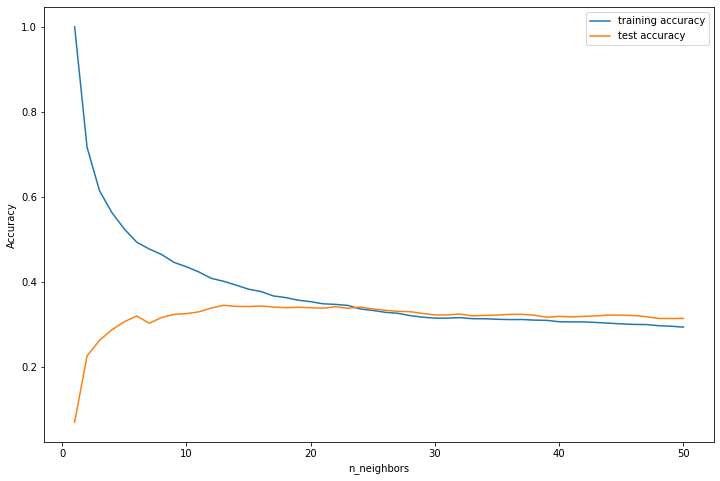

In [39]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [40]:
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 13


In [41]:
# Setting a model name

model_name_KNN = 'K-Nearest Neighbors Regression (KNN)'

# INSTANTIATING a model with the optimal number of neighbors
model = KNeighborsRegressor(algorithm = 'auto',
                                n_neighbors = opt_neighbors)



# FITTING the model based on the training data
model_fit = model.fit(x_train_STAND, y_train_STAND)



# PREDITCING on new data
model_pred = model_fit.predict(x_test_STAND)



# SCORING the results
model_train_score_KNN = model.score(x_train_STAND, y_train_STAND).round(4)
model_test_score_KNN = model.score(x_test_STAND, y_test_STAND).round(4)
model_gap_KNN        = abs(model_train_score_KNN - model_test_score_KNN).round(4)

# displaying results
print('Training Score :', model_train_score_KNN)
print('Testing Score  :', model_test_score_KNN)
print('Train-Test Gap :', model_gap_KNN)

Training Score : 0.637
Testing Score  : 0.6451
Train-Test Gap : 0.0081


# Part IV: Best Model - dynamically printing results

In [42]:
# dynamically printing results
print(f"""\
Model Name:     {model_name_ARD}
Train_Score:    {model_train_score_ARD.round(2)}
Test_Score:     {model_test_score_ARD.round(2)}
Train-Test Gap: {model_gap_ARD.round(2)}""")



Model Name:     ARD (Full Model)
Train_Score:    0.66
Test_Score:     0.7
Train-Test Gap: 0.04
